In [3]:
# Import libraries
import numpy as np
import pandas as pd 
import os

In [4]:
# Import and read the data
train = pd.read_csv('kaggle/input/train.csv')
test = pd.read_csv('kaggle/input/test.csv')

In [5]:
                                                        # EDA starts from here
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
                                                            # Plotting data
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [9]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

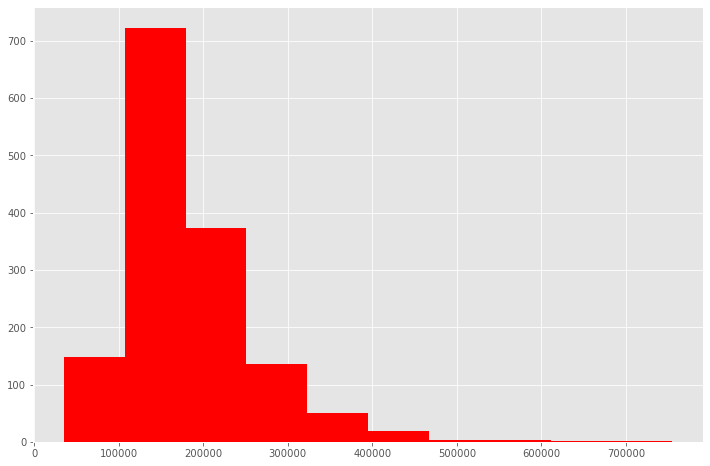

In [10]:
plt.hist(train.SalePrice, color='red')
plt.show()

Skew equal: 0.12133506220520406


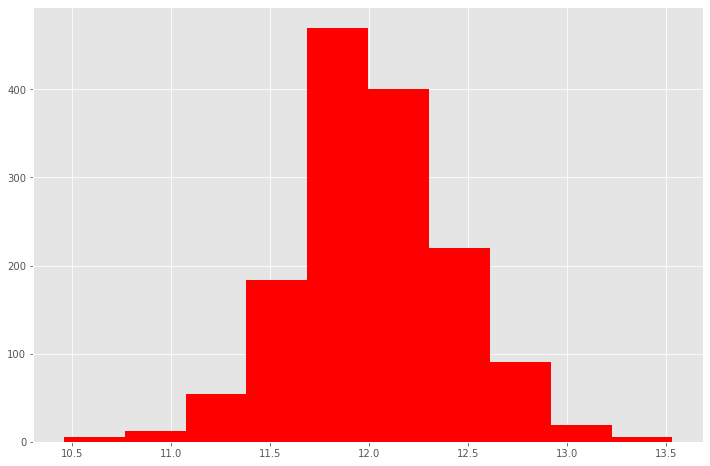

In [11]:
target = np.log(train.SalePrice)
print(f'Skew equal: {target.skew()}')
plt.hist(target, color='red')
plt.show()

In [12]:
# Look to features
num_features = train.select_dtypes(include=[np.number])
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [13]:
num_features.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [14]:
corr = num_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [15]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [16]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


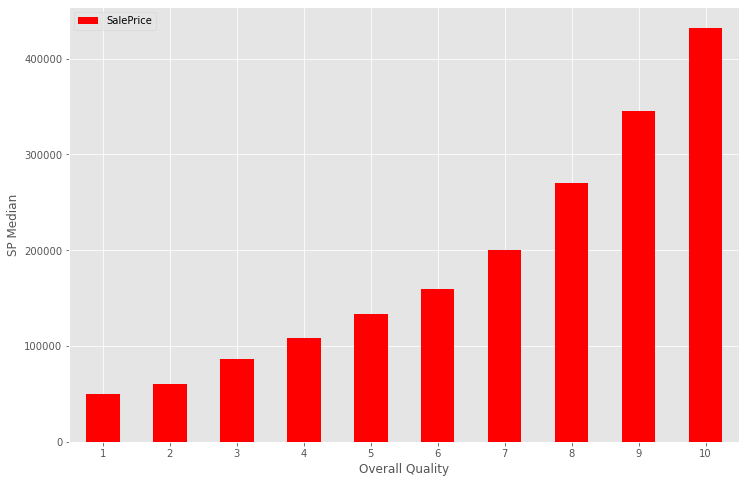

In [17]:
quality_pivot.plot(kind='bar', color='red')
plt.xlabel('Overall Quality')
plt.ylabel('SP Median')
plt.xticks(rotation=0)
plt.show()

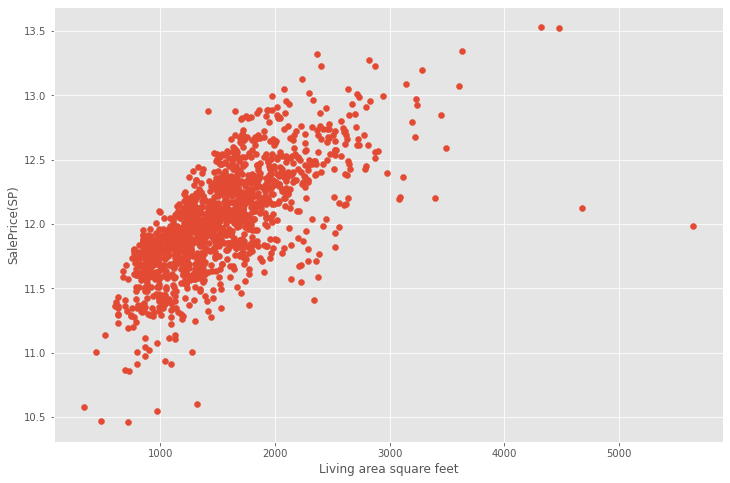

In [18]:
# Plot the scatterplot
plt.scatter(x=train['GrLivArea'], y=target)
plt.xlabel('Living area square feet')
plt.ylabel('SalePrice(SP)')
plt.show()

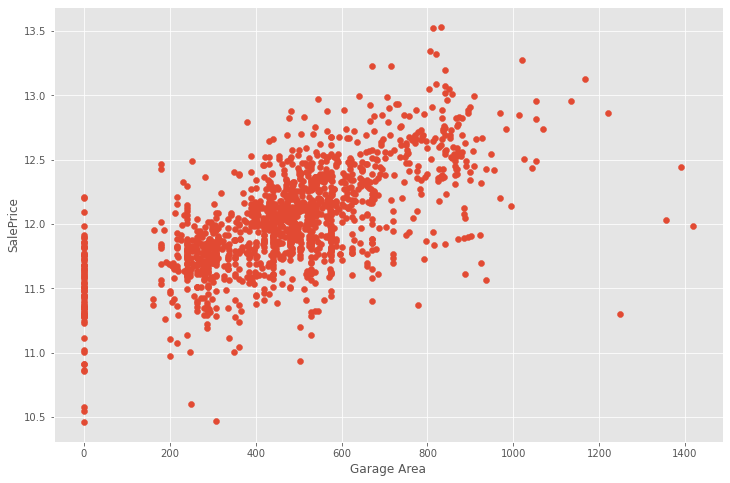

In [19]:
plt.scatter(x=train['GarageArea'], y=target)
plt.xlabel('Garage Area')
plt.ylabel('SalePrice')
plt.show()

In [20]:
train = train[train['GarageArea'] < 1200]

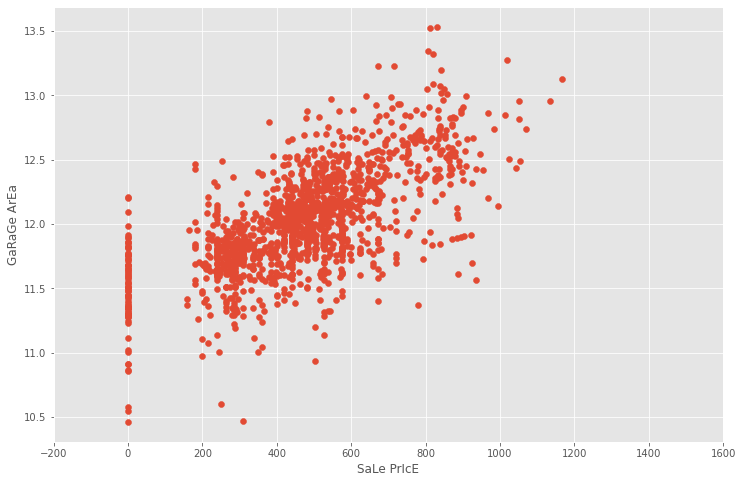

In [21]:
plt.scatter(x=train['GarageArea'], y=np.log(train['SalePrice']))
plt.xlim(-200, 1600)
plt.xlabel('SaLe PrIcE')
plt.ylabel('GaRaGe ArEa')
plt.show()

In [22]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


In [23]:
# We need see the unique values
print(f'Unique values: {train.MiscFeature.unique()}')

Unique values: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [24]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [25]:
print(train.Street.value_counts())

Pave    1450
Grvl       5
Name: Street, dtype: int64


In [26]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [27]:
print(train.enc_street.value_counts())

1    1450
0       5
Name: enc_street, dtype: int64


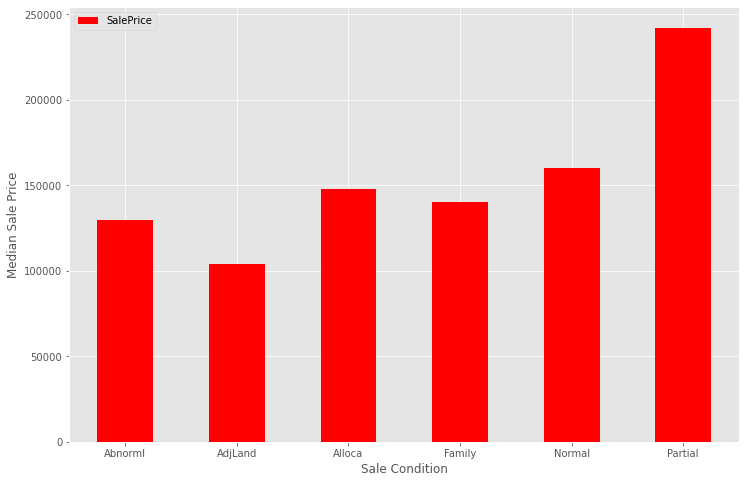

In [28]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [29]:
def encode(x):
    return 1 if x == 'Partial' else 0

In [30]:
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = train.SaleCondition.apply(encode)

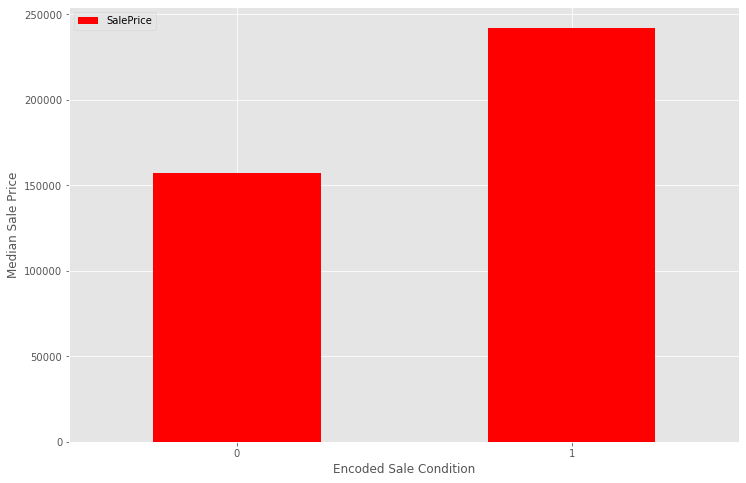

In [31]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [33]:
sum(data.isnull().sum() != 0)

0

In [34]:
X = data.drop(['SalePrice', 'Id'], axis=1)
y = np.log(train['SalePrice'])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.33)

In [46]:
                                                        # Building and training the model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [47]:
model = lr.fit(X_train, y_train)

In [48]:
print(f'R^2 equal: {model.score(X_test, y_test)}')

R^2 equal: 0.8840369419049559


In [49]:
predictions = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_test, predictions)

0.01915470946337366

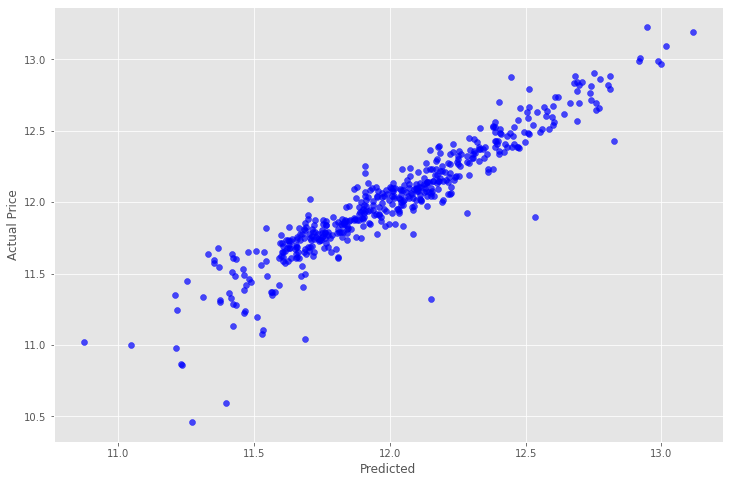

In [52]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual Price')
plt.show()

<ipython-input-53-d6c1f7d0df2e>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')


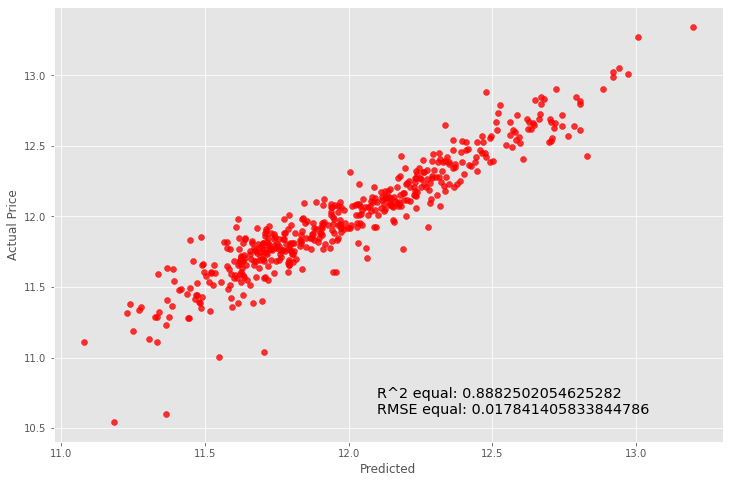

<ipython-input-53-d6c1f7d0df2e>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')


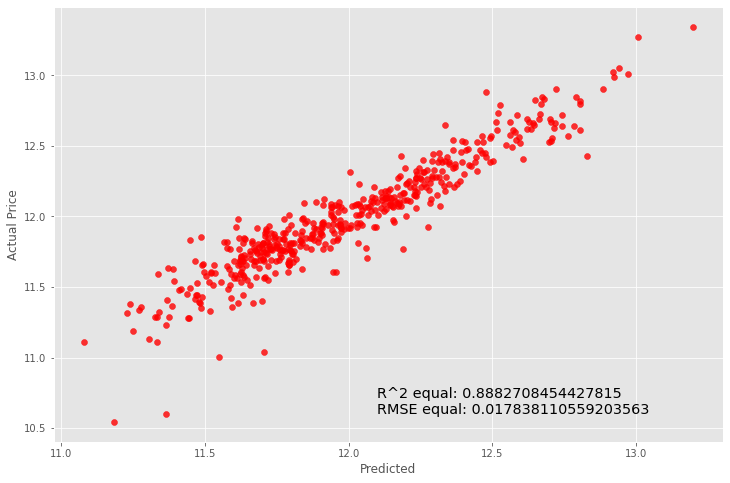

<ipython-input-53-d6c1f7d0df2e>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')


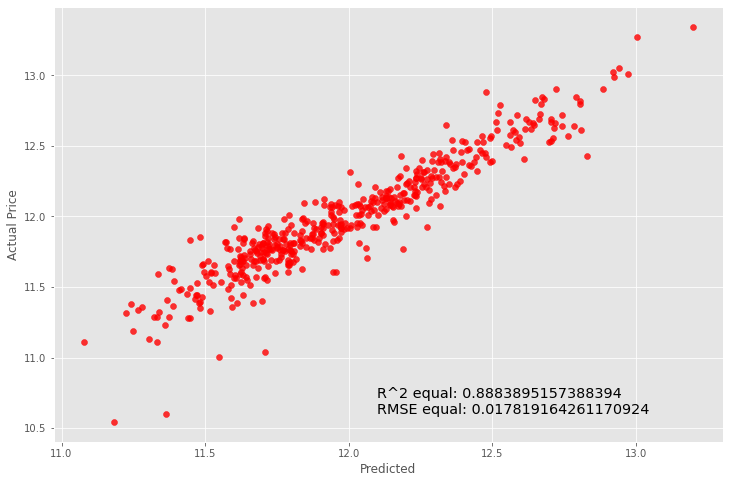

<ipython-input-53-d6c1f7d0df2e>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')


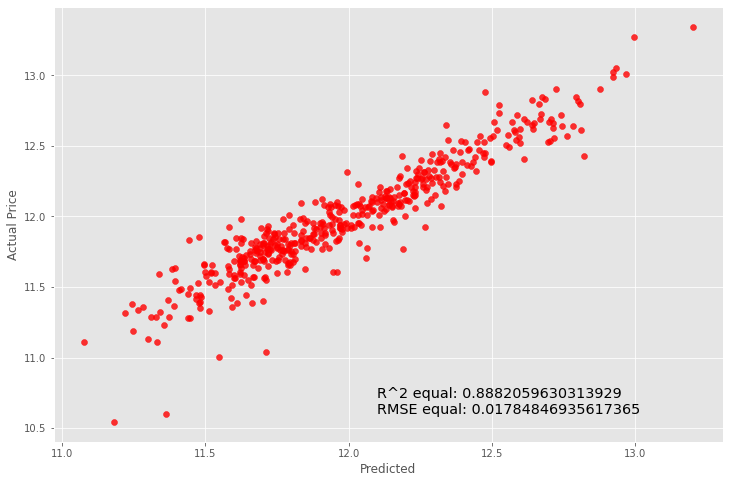

<ipython-input-53-d6c1f7d0df2e>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')


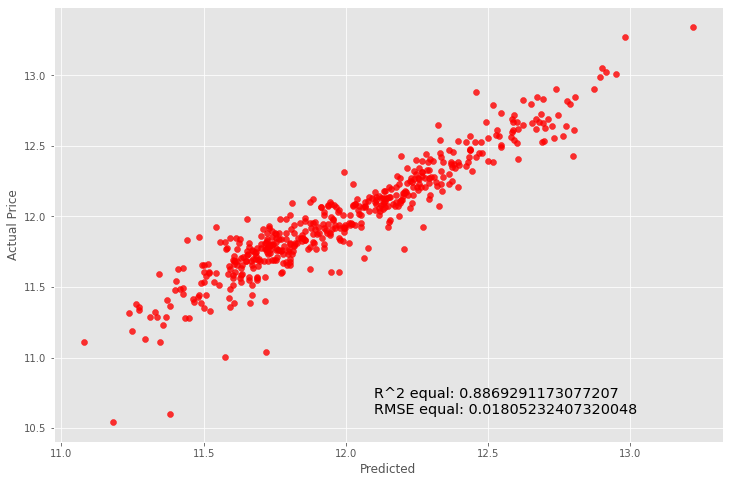

In [53]:
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.8, color='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual Price')
    
    overlay = 'R^2 equal: {}\nRMSE equal: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')
    plt.show()

In [54]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [55]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [56]:
predictions = model.predict(feats)

In [57]:
fin_pred = np.exp(predictions)

In [58]:
print(f'Original predictions: {predictions[:5]}\n')
print(f'Final predictions: {fin_pred[:5]}')

Original predictions: [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655]

Final predictions: [128959.49172585 122920.74024359 175704.82598102 200050.83263755
 182075.46986405]


In [59]:
submission['SalePrice'] = fin_pred
submission.head(10)

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864
5,1466,172318.333975
6,1467,191064.621642
7,1468,165488.559017
8,1469,193158.991332
9,1470,116214.025465


In [60]:
submission.to_csv('house_price_submission.csv', index=False)